In [1]:
import time
import warnings
import joblib
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.sparse import linalg
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import (
    train_test_split, 
    cross_val_score, 
    GridSearchCV, 
    RandomizedSearchCV, 
    learning_curve
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    make_scorer, 
    roc_curve, 
    auc
)
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, 
    QuadraticDiscriminantAnalysis
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier



ML

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv(r"C:/Users/Dark Hades/Desktop/Portflow/Challenge 2/DT/Train Dataset/Train Original Set/train.csv")
test = pd.read_csv(r"C:/Users/Dark Hades/Desktop/Portflow/Challenge 2/DT/Test Dataset/test.csv")

In [4]:
df = pd.concat([train, test], ignore_index=True)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

In [6]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [7]:
df.duplicated().sum()

0

In [8]:
cols = df.columns.tolist()
for col in cols:
    print(f'{col}: has {df[col].nunique()} unique values.')
    print(df[col].unique())
    print("---"*25)

Employee ID: has 74498 unique values.
[ 8410 64756 30257 ... 12409  9554 73042]
---------------------------------------------------------------------------
Age: has 42 unique values.
[31 59 24 36 56 38 47 48 57 30 29 40 19 33 49 51 39 54 23 45 42 53 37 34
 25 41 55 21 28 26 52 50 27 58 43 35 46 44 20 18 22 32]
---------------------------------------------------------------------------
Gender: has 2 unique values.
['Male' 'Female']
---------------------------------------------------------------------------
Years at Company: has 51 unique values.
[19  4 10  7 41  3 23 16 44  1 12  6 38 22 30  9 37 33 13  5 21 32 34 11
  2 18 27 17 36  8 28 35 14 24 40 15 45 39 20 43 26 29 46 42 25 31 47 48
 49 50 51]
---------------------------------------------------------------------------
Job Role: has 5 unique values.
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
---------------------------------------------------------------------------
Monthly Income: has 9842 unique values.
[ 5390  553

In [9]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [10]:
df.describe().drop('Employee ID', axis=1).T

,count,mean,std,min,25%,50%,75%,max
Age,74498.0,38.529746,12.083456,18.0,28.0,39.0,49.0,59.0
Years at Company,74498.0,15.721603,11.223744,1.0,7.0,13.0,23.0,51.0
Monthly Income,74498.0,7299.379514,2152.508566,1226.0,5652.0,7348.0,8876.0,16149.0
Number of Promotions,74498.0,0.832935,0.995289,0.0,0.0,1.0,2.0,4.0
Distance from Home,74498.0,49.991584,28.513611,1.0,25.0,50.0,75.0,99.0
Number of Dependents,74498.0,1.650326,1.553633,0.0,0.0,1.0,3.0,6.0
Company Tenure,74498.0,55.727456,25.399349,2.0,36.0,56.0,76.0,128.0


In [11]:
df.describe(include='object').T

,count,unique,top,freq
Gender,74498,2,Male,40826
Job Role,74498,5,Technology,19322
Work-Life Balance,74498,4,Good,28158
Job Satisfaction,74498,4,High,37245
Performance Rating,74498,4,Average,44719
Overtime,74498,2,No,50157
Education Level,74498,5,Bachelor’s Degree,22331
Marital Status,74498,3,Married,37419
Job Level,74498,3,Entry,29780
Company Size,74498,3,Medium,37231


In [12]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,22,Associate Degree,Married,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,No,21,Master’s Degree,Divorced,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,No,11,Bachelor’s Degree,Married,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,No,27,High School,Single,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,71,High School,Divorced,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


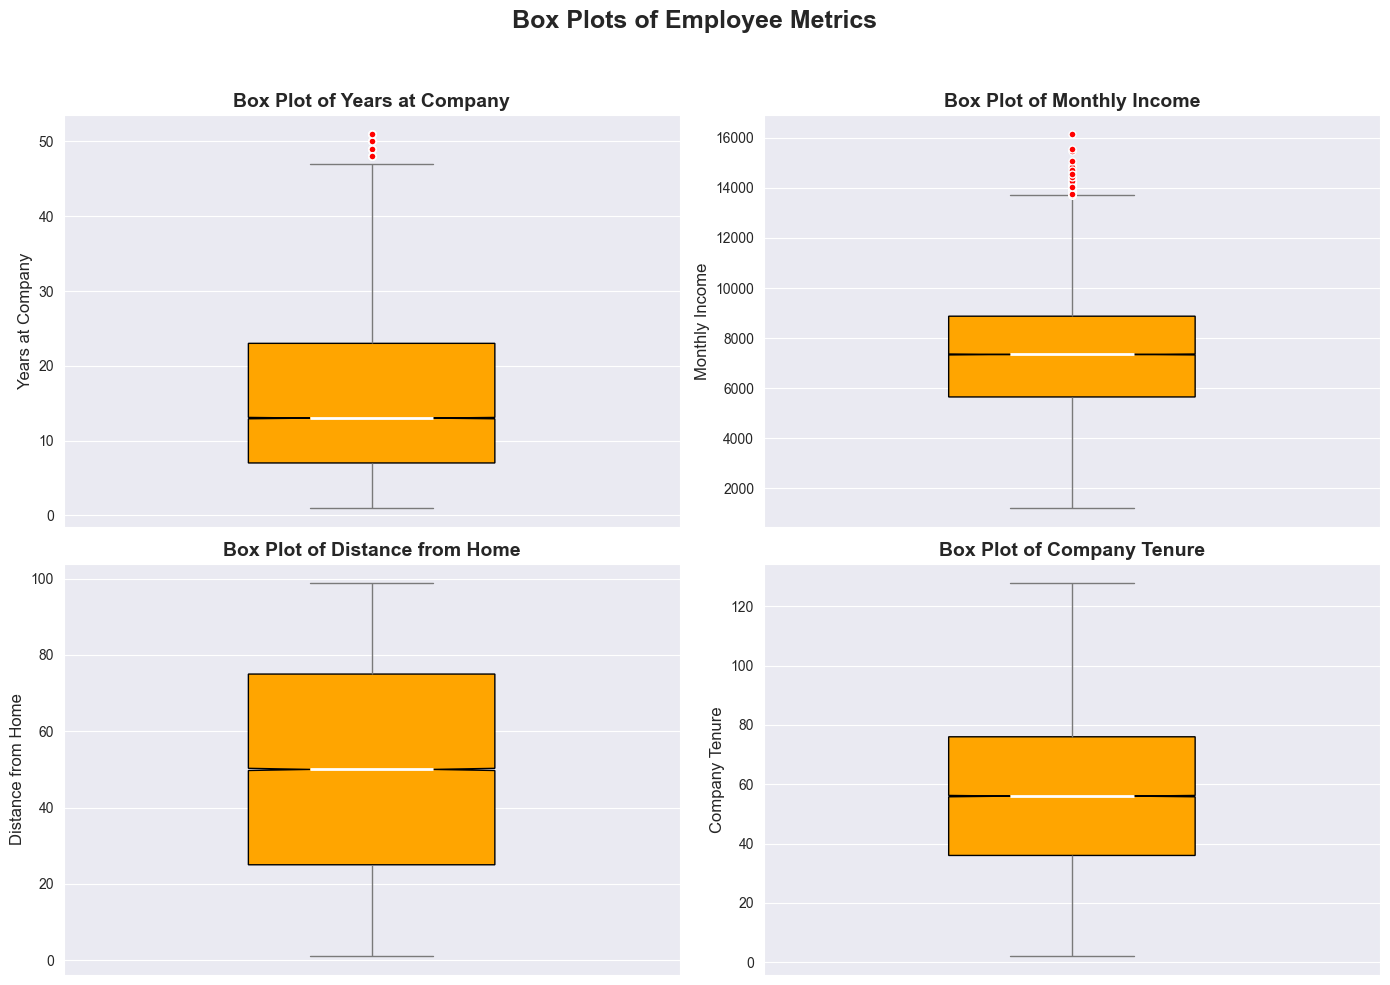

In [13]:
sns.set_style("darkgrid")  
sns.set_palette("pastel")  


columns = ['Years at Company', 'Monthly Income', 'Distance from Home', 'Company Tenure']


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Box Plots of Employee Metrics", fontsize=18, fontweight="bold")


for ax, col in zip(axes.flatten(), columns):
    sns.boxplot(data=df, y=col, ax=ax, width=0.4, notch=True, saturation=0.8, 
                boxprops=dict(facecolor="orange", edgecolor="black"), 
                medianprops=dict(color="white", linewidth=2),
                flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='white'))

    ax.set_title(f'Box Plot of {col}', fontsize=14, fontweight="bold")
    ax.set_ylabel(col, fontsize=12)
    ax.tick_params(axis='y', labelsize=10, rotation=0)


plt.tight_layout(rect=[0, 0, 1, 0.95])


plt.show()


In [14]:
df[abs(df['Age'] - df['Years at Company']) < 18].sample(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
51226,54673,44,Male,34,Healthcare,8294,Excellent,High,High,1,Yes,83,Master’s Degree,Married,3,Senior,Small,39,No,No,No,Good,Medium,Stayed
33967,51329,18,Male,2,Education,5131,Fair,Very High,High,2,No,80,PhD,Married,0,Mid,Small,69,Yes,No,Yes,Good,Low,Stayed
45300,47541,21,Female,8,Technology,11552,Fair,Very High,Average,3,No,77,Bachelor’s Degree,Married,0,Entry,Medium,40,Yes,No,Yes,Good,Very High,Stayed
70026,36210,26,Male,17,Healthcare,8136,Fair,High,High,0,Yes,68,High School,Divorced,3,Senior,Medium,49,No,No,Yes,Good,Medium,Left
25075,28067,52,Female,44,Healthcare,7747,Fair,High,High,0,Yes,61,Bachelor’s Degree,Married,0,Senior,Medium,49,No,No,Yes,Good,Medium,Stayed
43759,41754,42,Female,32,Education,4258,Fair,Medium,Average,0,No,72,High School,Married,4,Mid,Medium,89,No,No,No,Poor,Medium,Stayed
27307,41156,21,Male,10,Education,5053,Excellent,Medium,Average,0,No,23,Bachelor’s Degree,Married,4,Entry,Medium,18,No,No,No,Poor,High,Stayed
70567,15673,20,Female,6,Healthcare,9224,Good,Medium,Average,2,No,85,Bachelor’s Degree,Single,3,Entry,Medium,7,No,No,No,Poor,Medium,Left
63484,49370,18,Male,6,Healthcare,6927,Good,High,High,0,Yes,29,Master’s Degree,Married,1,Entry,Medium,7,No,No,No,Poor,Low,Left
47148,57325,36,Male,20,Media,5557,Good,High,High,0,No,86,High School,Married,5,Mid,Medium,77,No,No,No,Good,High,Stayed


In [15]:
df[abs(df['Age'] - df['Years at Company']) < 18].shape[0]

29812

In [16]:
df = df[abs(df['Age'] - df['Years at Company']) >= 18]

In [17]:
df.drop('Job Role', axis=1, inplace=True)

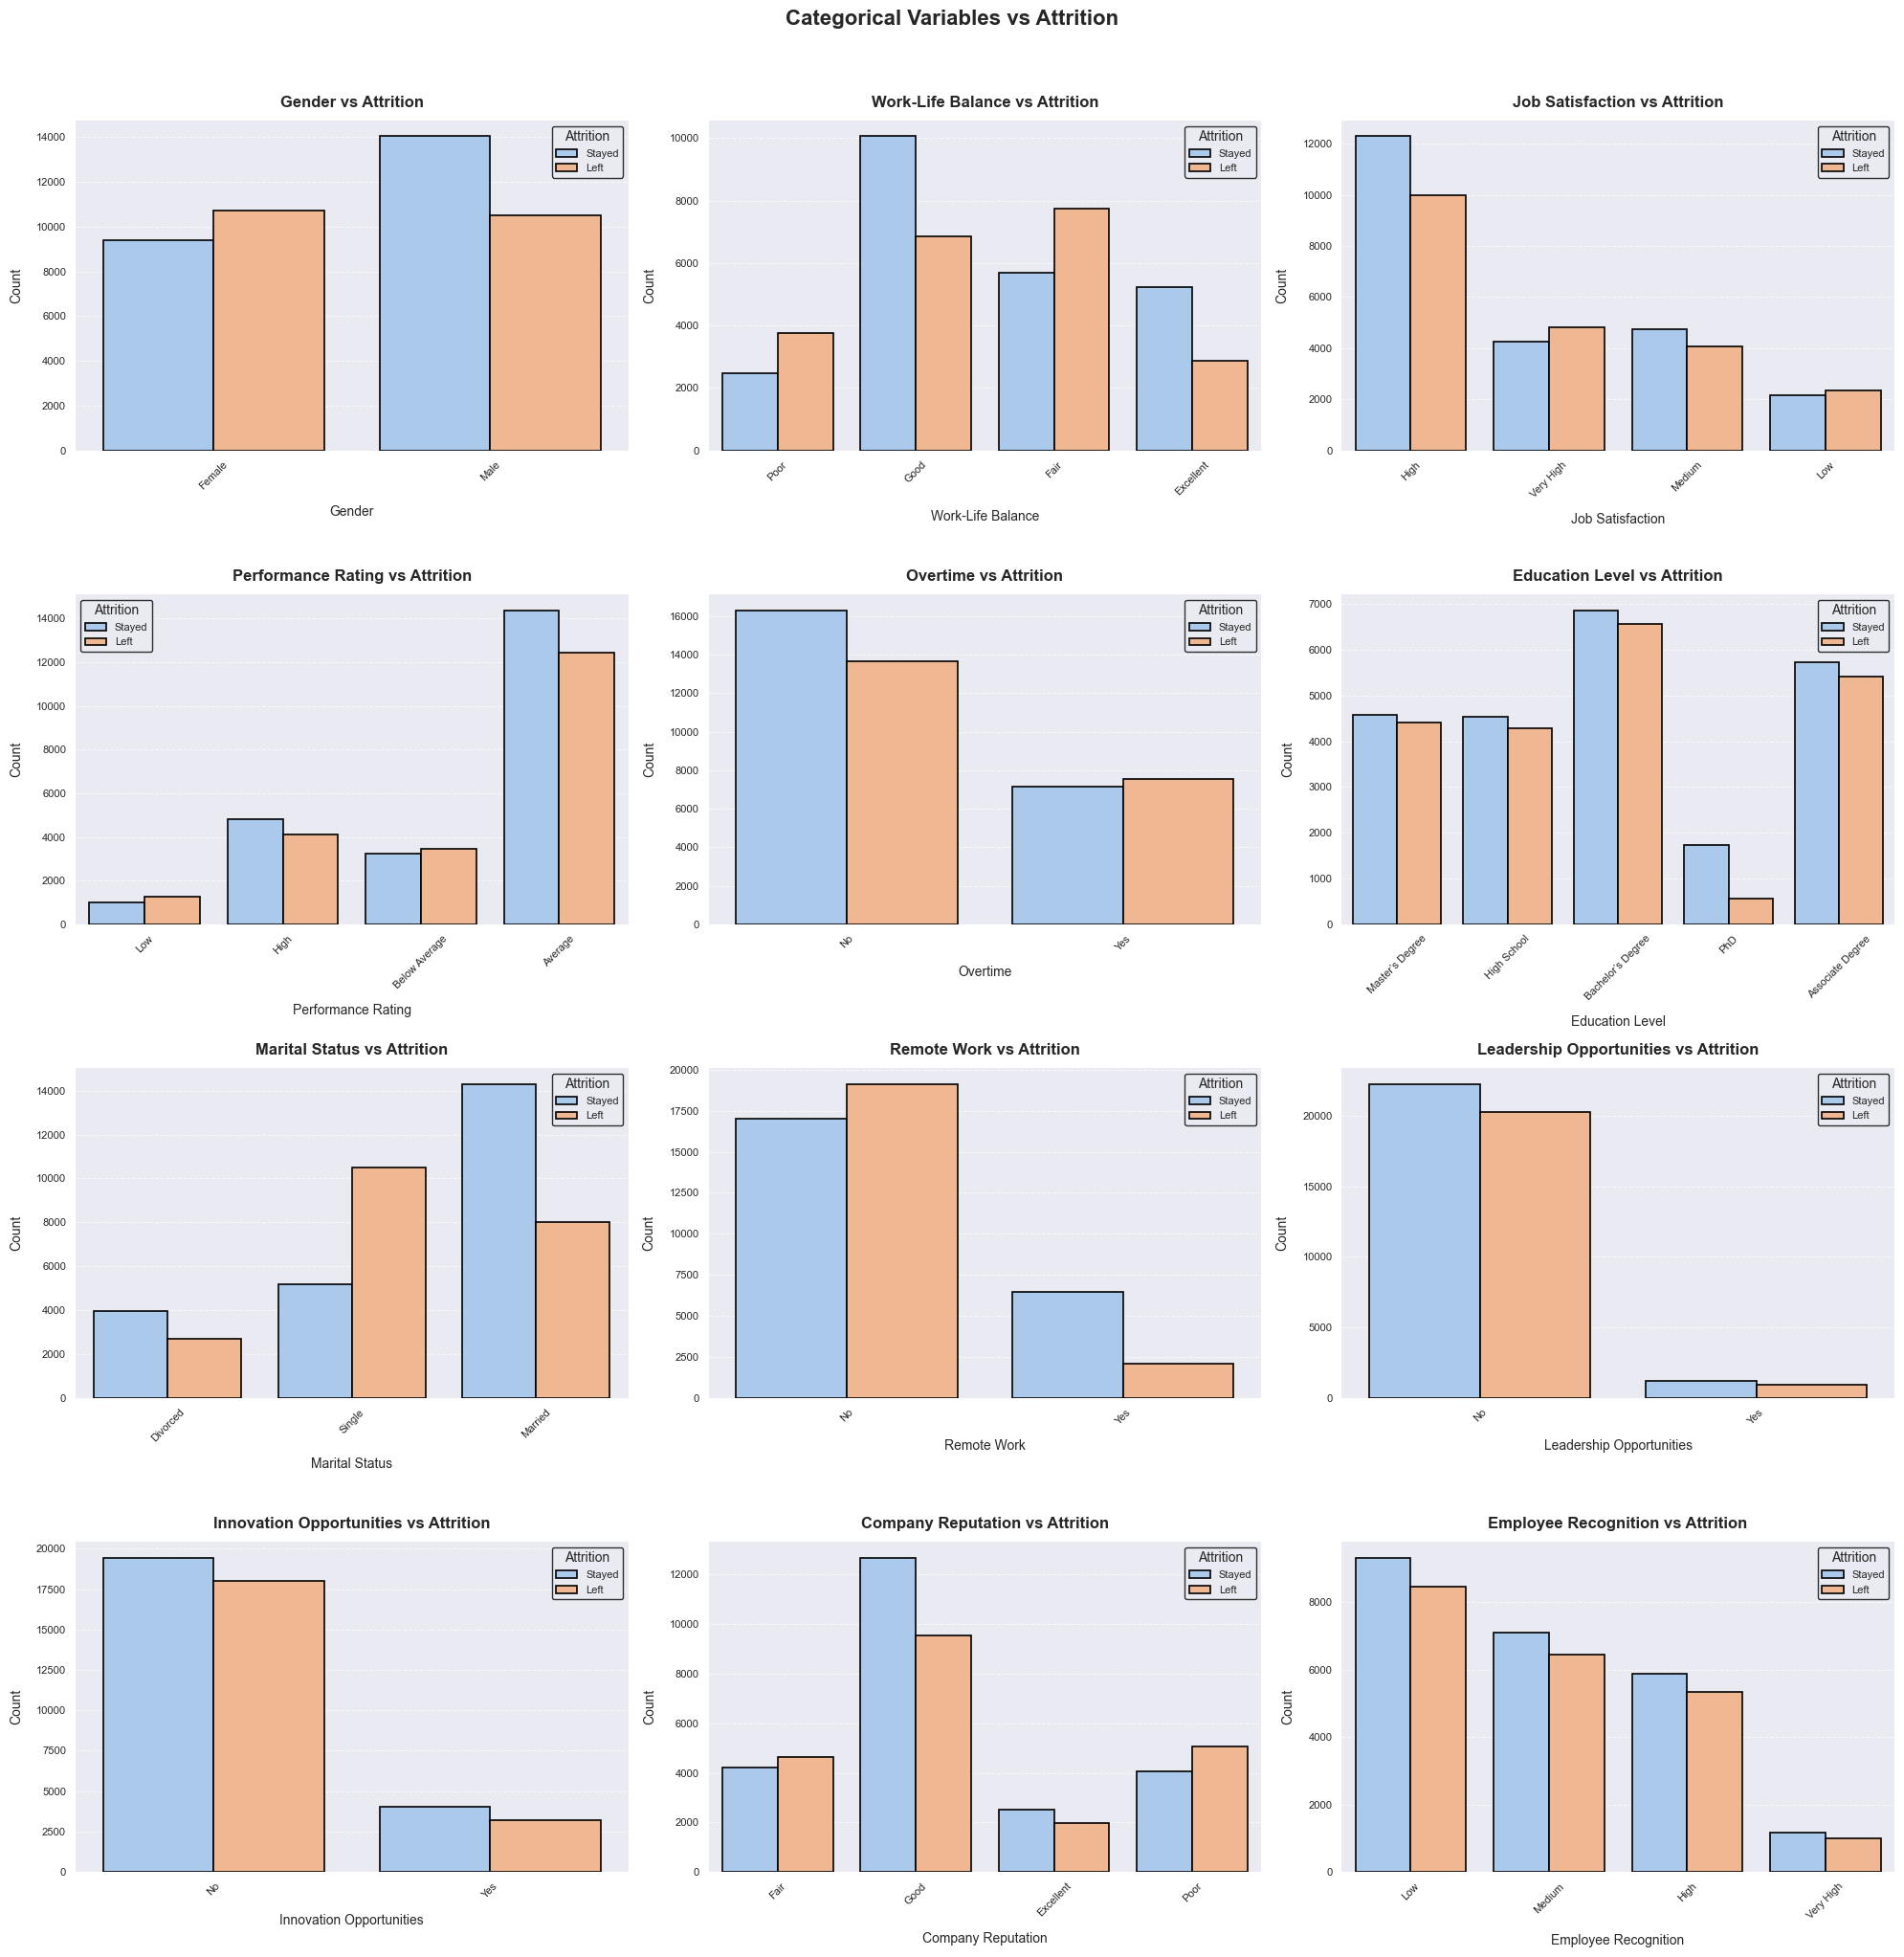

In [18]:
categorical_columns = ['Gender', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 
                       'Overtime', 'Education Level', 'Marital Status', 'Remote Work', 
                       'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 
                       'Employee Recognition']


num_cols = 3  
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))  
fig.suptitle('Categorical Variables vs Attrition', fontsize=16, fontweight='bold', y=1.02)  
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='Attrition', data=df, palette='pastel', edgecolor='black', linewidth=1.2, ax=axes[i])
    
    
    axes[i].set_title(f'{col} vs Attrition', fontsize=12, fontweight='bold', pad=10)
    axes[i].set_xlabel(col, fontsize=10, labelpad=10)
    axes[i].set_ylabel('Count', fontsize=10, labelpad=10)
    
    
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    
   
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
   
    axes[i].legend(title='Attrition', title_fontsize=10, fontsize=8, edgecolor='black')
    
   
    sns.despine(left=True, bottom=True, ax=axes[i])


for j in range(len(categorical_columns), num_rows * num_cols):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

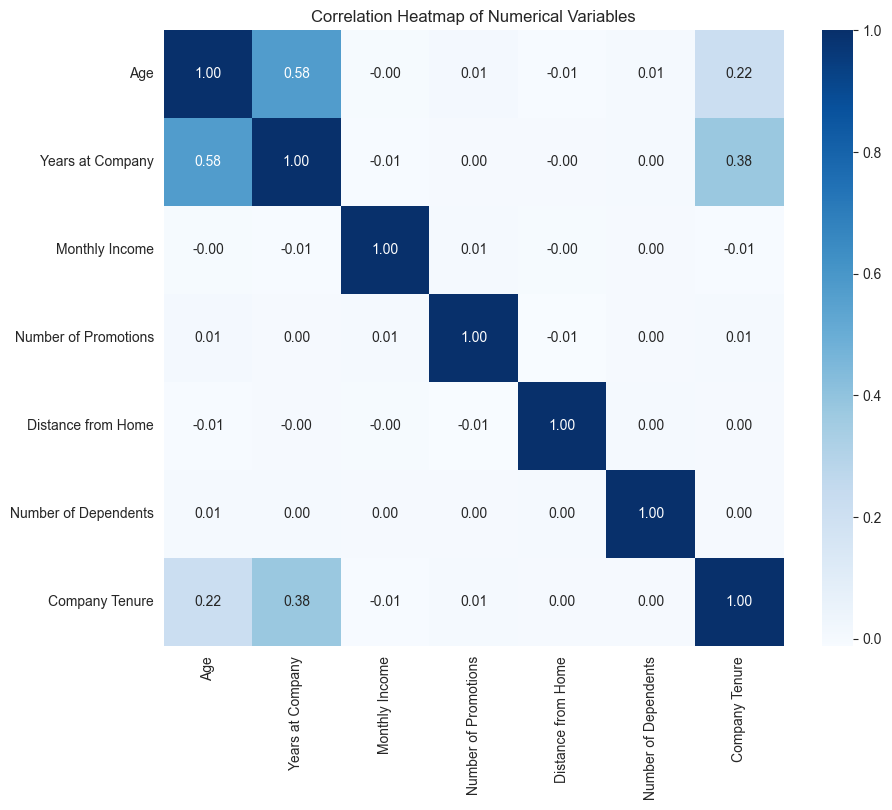

In [19]:

numerical_columns = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 
                     'Distance from Home', 'Number of Dependents', 'Company Tenure']


plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


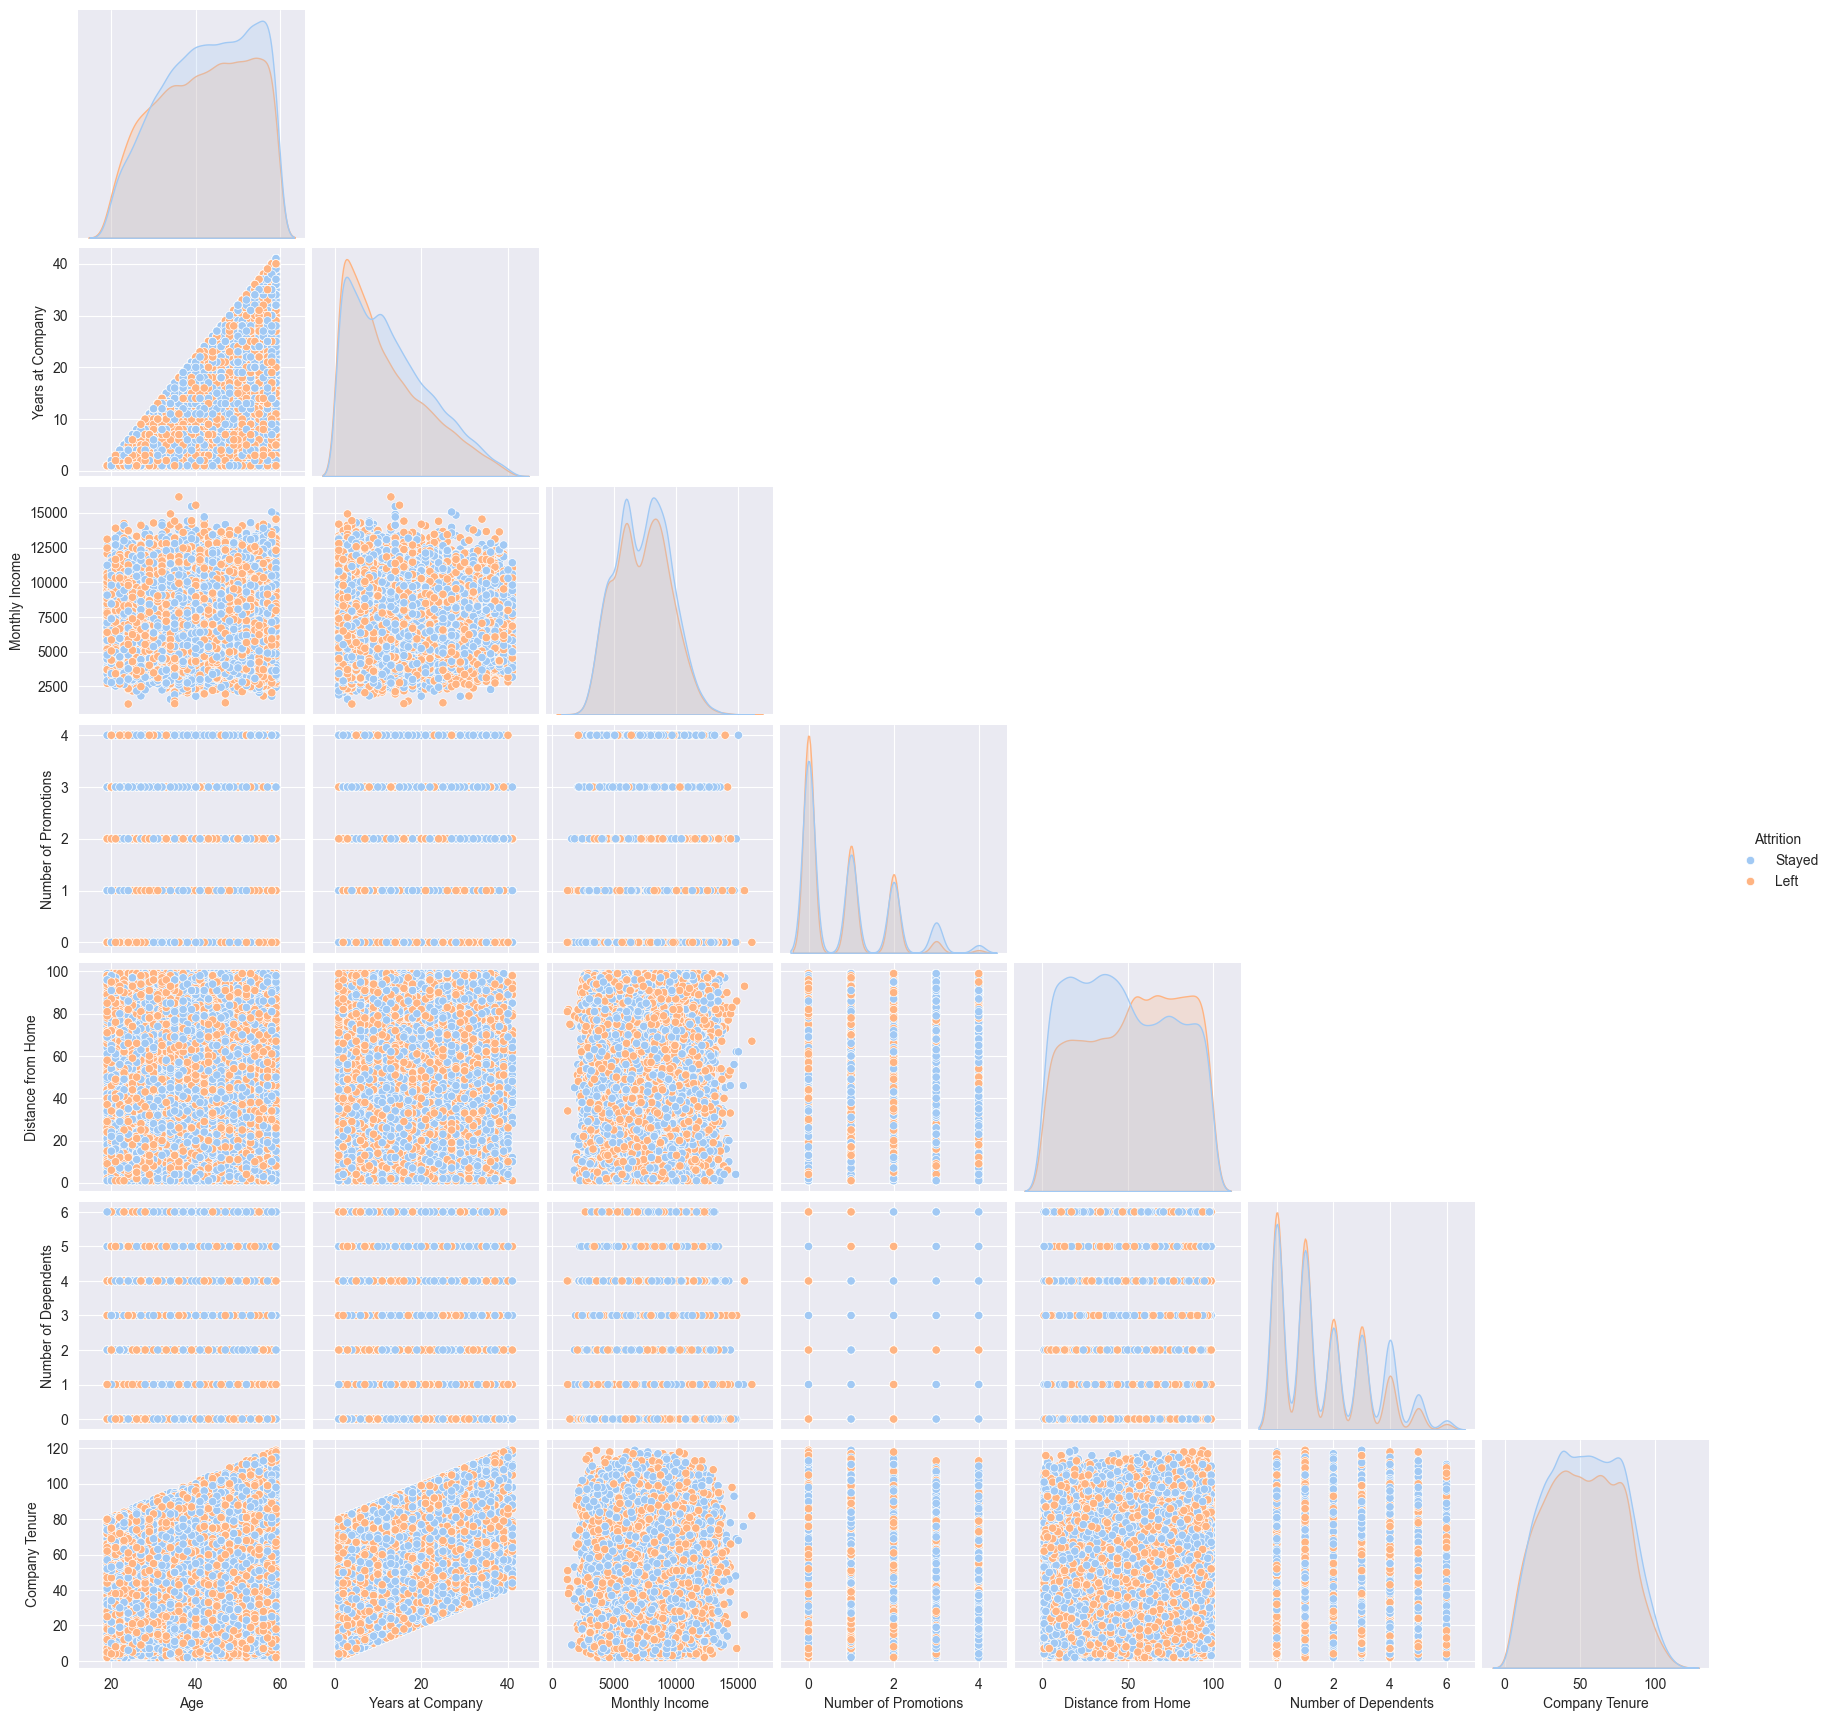

In [20]:
sns.pairplot(df, hue='Attrition', vars=numerical_columns, diag_kind='kde', corner=True)
plt.show()


Gender: Chi-Square Statistic = 480.9090672111272, p-value = 1.3549805541186008e-106
Work-Life Balance: Chi-Square Statistic = 1755.0775839009605, p-value = 0.0
Job Satisfaction: Chi-Square Statistic = 224.26062352662842, p-value = 2.4080455257450425e-48
Performance Rating: Chi-Square Statistic = 126.74414258468278, p-value = 2.72050811750671e-27
Overtime: Chi-Square Statistic = 136.34511654539483, p-value = 1.6769709095148662e-31
Education Level: Chi-Square Statistic = 532.4531271002018, p-value = 6.3995898503256964e-114
Marital Status: Chi-Square Statistic = 3712.1045773426217, p-value = 0.0
Remote Work: Chi-Square Statistic = 2216.6394911687203, p-value = 0.0
Leadership Opportunities: Chi-Square Statistic = 8.950631397249657, p-value = 0.0027737369896921977
Innovation Opportunities: Chi-Square Statistic = 28.761877462625982, p-value = 8.184642236642496e-08
Company Reputation: Chi-Square Statistic = 528.4329382249655, p-value = 3.2847322263609506e-114
Employee Recognition: Chi-Square 

C:\Users\Dark Hades\AppData\Local\Temp\ipykernel_32888\649937748.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categorical_columns, rotation=45, ha='right', fontsize=10)


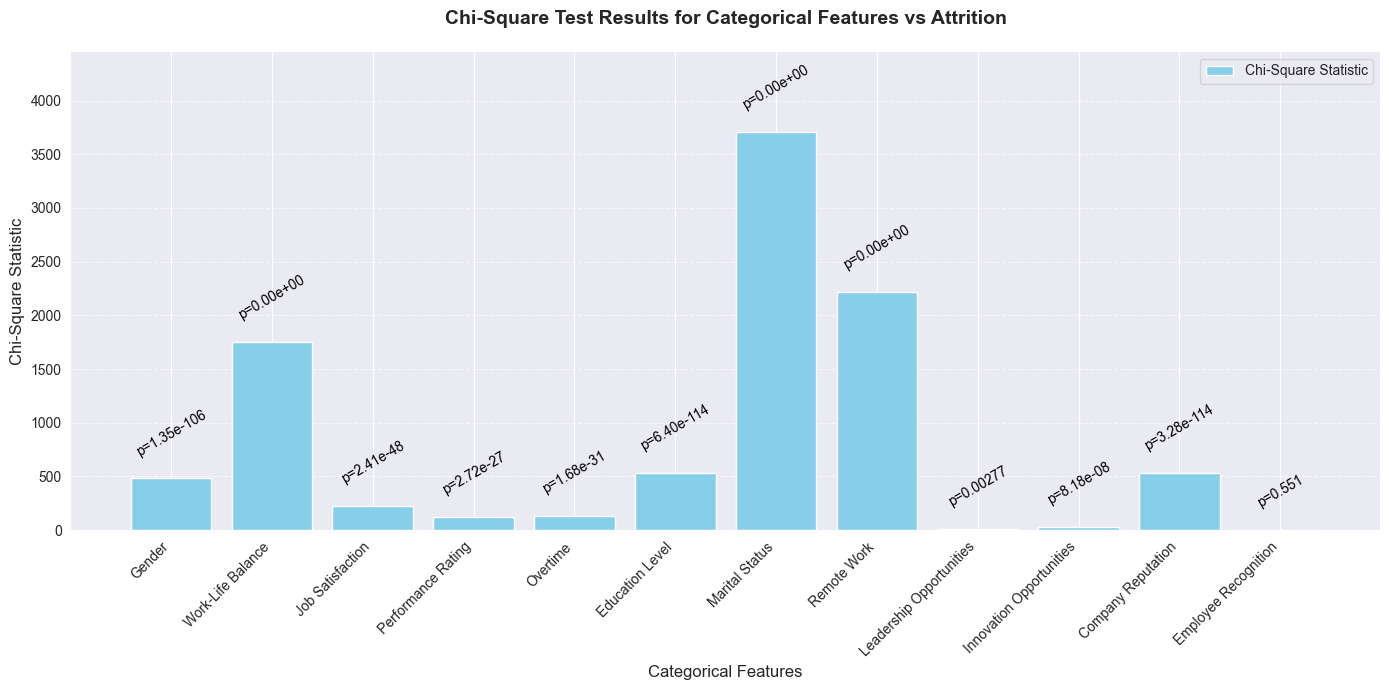

In [21]:
categorical_columns = ['Gender', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 
                       'Overtime', 'Education Level', 'Marital Status', 'Remote Work', 
                       'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 
                       'Employee Recognition']


chi2_stats = []
p_values = []


for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_values.append(p)
    print(f'{col}: Chi-Square Statistic = {chi2}, p-value = {p}')


fig, ax = plt.subplots(figsize=(14, 7))


bars = ax.bar(categorical_columns, chi2_stats, color='skyblue', label='Chi-Square Statistic')


ax.set_xticklabels(categorical_columns, rotation=45, ha='right', fontsize=10)


for bar, p in zip(bars, p_values):
    height = bar.get_height()
    if height > 0:
        p_text = f'p={p:.3g}' if p >= 0.001 else f'p={p:.2e}'  # Scientific notation for very small p-values
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.05 * max(chi2_stats), 
                p_text, ha='center', va='bottom', fontsize=10, color='black', rotation=30)


ax.set_xlabel('Categorical Features', fontsize=12)
ax.set_ylabel('Chi-Square Statistic', fontsize=12)
ax.set_title('Chi-Square Test Results for Categorical Features vs Attrition', fontsize=14, fontweight='bold', pad=20)


ax.set_ylim(0, max(chi2_stats) * 1.2)


ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10)


sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()


In [22]:

numerical_columns = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
X = df[numerical_columns]
y = df['Attrition'].apply(lambda x: 1 if x == 'Left' else 0) 


X = sm.add_constant(X)


logit_model = sm.Logit(y, X)
result = logit_model.fit()


print(result.summary())

Optimization terminated successfully.
         Current function value: 0.678671
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                44686
Model:                          Logit   Df Residuals:                    44678
Method:                           MLE   Df Model:                            7
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                 0.01915
Time:                        10:18:59   Log-Likelihood:                -30327.
converged:                       True   LL-Null:                       -30919.
Covariance Type:            nonrobust   LLR p-value:                2.023e-251
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1500      0.059      2.564      0.010       0.035       0.265

In [23]:
ordinal_mappings = {
    'Work-Life Balance': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Job Satisfaction': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Performance Rating': {'Low': 1, 'Below Average': 2, 'Average': 3, 'High': 4},
    'Education Level': {'High School': 1, 'Associate Degree': 2, 'Bachelor’s Degree': 3, 'Master’s Degree': 4, 'PhD': 5},
    'Job Level': {'Entry': 1, 'Mid': 2, 'Senior': 3},
    'Company Reputation': {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4},
    'Employee Recognition': {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4},
    'Company Size' : {'Small': 1, 'Medium': 2, 'Large': 3},
}
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

In [24]:
binary_columns = ['Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 
                  'Attrition', 'Overtime', 'Gender']


binary_mapping = {'No': 0, 'Yes': 1, 'Stayed': 0, 'Left': 1, 'Male': 0, 'Female': 1}


for column in binary_columns:
    df[column] = df[column].replace(binary_mapping)


C:\Users\Dark Hades\AppData\Local\Temp\ipykernel_32888\3752775850.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(binary_mapping)


In [25]:

df = pd.get_dummies(df, columns=['Marital Status'], drop_first=True)

In [26]:
X = df.drop(columns=['Employee ID', 'Attrition'], axis=1)
y = df['Attrition']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


selected_features = [
    'Job Level', 'Gender', 'Job Satisfaction', 'Overtime', 'Distance from Home',
    'Monthly Income', 'Company Tenure', 'Age', 'Years at Company',
    'Marital Status_Single', 'Work-Life Balance', 'Remote Work', 'Number of Dependents'
]

# Subset the datasets using the selected features
X_train_selected = X_train[selected_features]
X_val_selected   = X_val[selected_features]
X_test_selected  = X_test[selected_features]

print(f"Selected training data shape: {X_train_selected.shape}")
print(f"Selected validation data shape: {X_val_selected.shape}")
print(f"Selected testing data shape: {X_test_selected.shape}")


Training set: (31280, 22), Validation set: (6703, 22), Test set: (6703, 22)
Selected training data shape: (31280, 13)
Selected validation data shape: (6703, 13)
Selected testing data shape: (6703, 13)


In [27]:
start_time = time.time()


model = XGBClassifier(random_state=42)
model.fit(X_train_selected, y_train)

end_time = time.time()
training_time = end_time - start_time
print(f"Training Time: {training_time:.2f} seconds")

y_pred = model.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Initial Validation Set Performance:")
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

conf_matrix = confusion_matrix(y_val, y_pred)
print("Confusion Matrix (Validation Set):")
print(conf_matrix)


Training Time: 1.97 seconds
Initial Validation Set Performance:
Accuracy: 0.7186334477099806, Precision: 0.7031847133757961, Recall: 0.698292220113852, F1-Score: 0.7007299270072993
Confusion Matrix (Validation Set):
[[2609  932]
 [ 954 2208]]


In [28]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2],

    'tree_method': ['gpu_hist']
}

start_time = time.time()

random_search = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_selected, y_train)

end_time = time.time()
tuning_time = end_time - start_time
print(f"Hyperparameter Tuning Time: {tuning_time:.2f} seconds")

best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\Dark Hades\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Hyperparameter Tuning Time: 51.17 seconds
Best Hyperparameters: {'tree_method': 'gpu_hist', 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1}


In [29]:
best_model = random_search.best_estimator_

best_model.fit(X_train_selected, y_train)


y_pred_val = best_model.predict(X_val_selected)
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)

print("Final Validation Performance:")
print(f"Accuracy: {accuracy_val}, Precision: {precision_val}, Recall: {recall_val}, F1-Score: {f1_val}")


conf_matrix_val = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix (Validation Set):")
print(conf_matrix_val)


c:\Users\Dark Hades\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


Final Validation Performance:
Accuracy: 0.7405639266000298, Precision: 0.7258013329101872, Recall: 0.7232764073371284, F1-Score: 0.7245366703627435
Confusion Matrix (Validation Set):
[[2677  864]
 [ 875 2287]]


c:\Users\Dark Hades\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\Dark Hades\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that mat

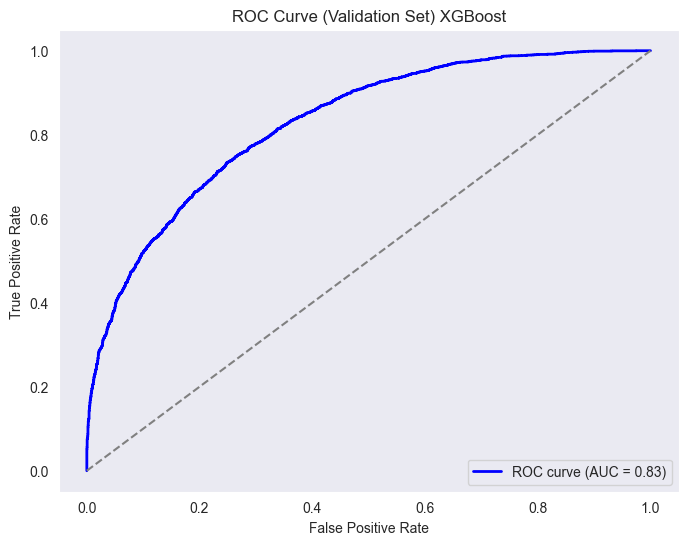

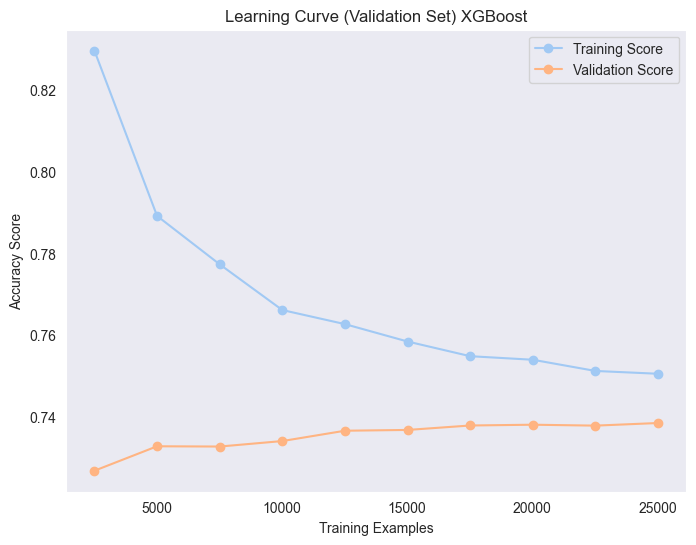

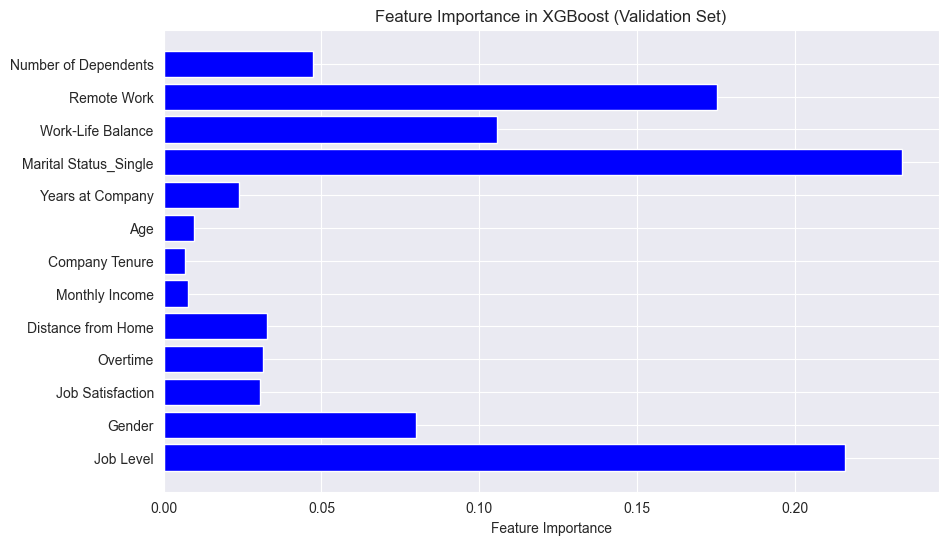

In [30]:
y_probs = best_model.predict_proba(X_val_selected)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set) XGBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()


train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_selected, y_train, cv=5, scoring="accuracy", n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', label="Training Score")
plt.plot(train_sizes, val_mean, marker='o', label="Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve (Validation Set) XGBoost")
plt.legend()
plt.grid()
plt.show()


importances = best_model.feature_importances_
feature_names = X_train_selected.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='blue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in XGBoost (Validation Set)")
plt.show()


Final Test Set Performance:
Accuracy: 0.7400, Precision: 0.7294, Recall: 0.7310, F1-Score: 0.7302
Prediction Time: 0.0334 seconds


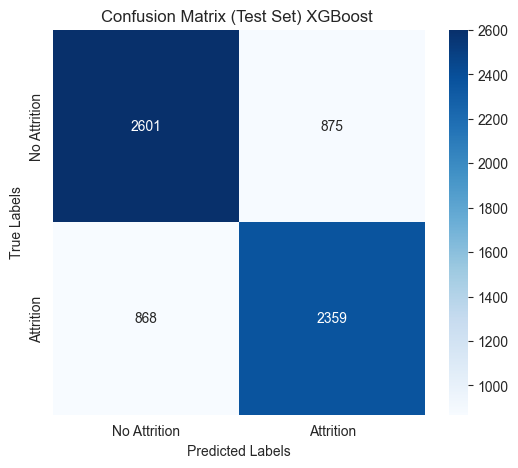

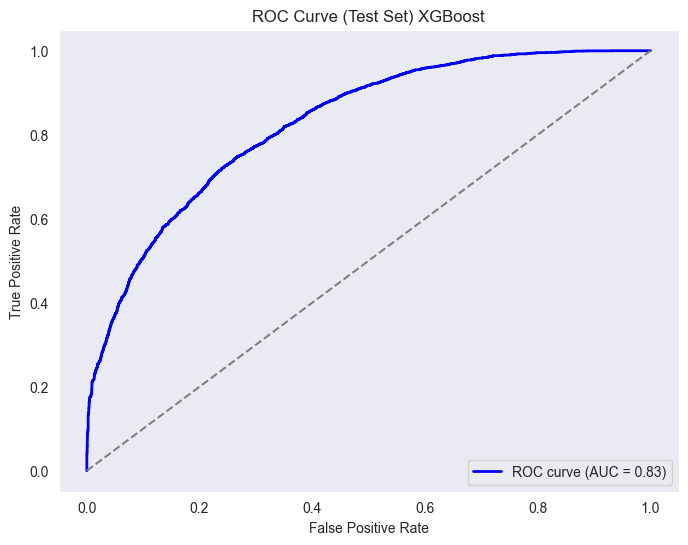

Confusion Matrix (Test Set) XGBoost:
[[2601  875]
 [ 868 2359]]


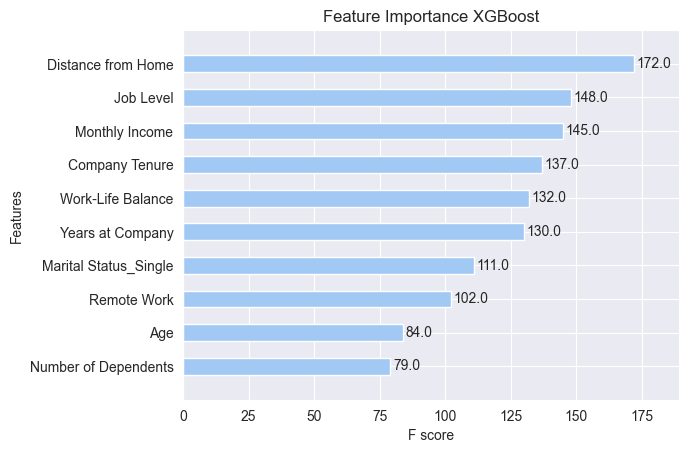

In [31]:
start_time = time.time()

y_test_pred = best_model.predict(X_test_selected)

end_time = time.time()


prediction_time = end_time - start_time


accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Final Test Set Performance:")
print(f"Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1-Score: {f1_test:.4f}")
print(f"Prediction Time: {prediction_time:.4f} seconds")


conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Test Set) XGBoost ")
plt.show()


y_probs_test = best_model.predict_proba(X_test_selected)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set) XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()

print("Confusion Matrix (Test Set) XGBoost:")
print(conf_matrix_test)


xgb.plot_importance(best_model, importance_type='weight', max_num_features=10, title="Feature Importance XGBoost", height=0.5)
plt.show()


MLP

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [33]:
X = df.drop(columns=['Employee ID', 'Attrition'], axis=1)
y = df['Attrition']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


selected_features = [
    'Job Level', 'Gender', 'Job Satisfaction', 'Overtime', 'Distance from Home',
    'Monthly Income', 'Company Tenure', 'Age', 'Years at Company',
    'Marital Status_Single', 'Work-Life Balance', 'Remote Work', 'Number of Dependents'
]


X_train_selected = X_train[selected_features]
X_val_selected   = X_val[selected_features]
X_test_selected  = X_test[selected_features]

print(f"Selected training data shape: {X_train_selected.shape}")
print(f"Selected validation data shape: {X_val_selected.shape}")
print(f"Selected testing data shape: {X_test_selected.shape}")


Training set: (31280, 22), Validation set: (6703, 22), Test set: (6703, 22)
Selected training data shape: (31280, 13)
Selected validation data shape: (6703, 13)
Selected testing data shape: (6703, 13)


In [34]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))  
    model.add(Dropout(0.2))  

    # Hidden layers
    model.add(Dense(12, activation='relu'))  
    model.add(Dropout(0.3))  
    model.add(Dense(10, activation='relu'))  
   
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(learning_rate=0.001), 
        metrics=['accuracy']
    )
    
    return model



In [36]:

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,  
    executions_per_trial=1,
    directory='hyper_tuning',
    project_name='MLP_optimization'
)


tuner.search(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=20, batch_size=64, verbose=1)


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"Best Hyperparameters: {best_hps.values}")


Reloading Tuner from hyper_tuning\MLP_optimization\tuner0.json
Best Hyperparameters: {'units_1': 224, 'dropout_1': 0.4, 'units_2': 32, 'dropout_2': 0.30000000000000004, 'units_3': 48, 'learning_rate': 0.001}


In [38]:

best_model = tuner.hypermodel.build(best_hps)

best_model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

history = best_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=50, 
    batch_size=64,
    verbose=1
)


c:\Users\Dark Hades\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5607 - loss: 0.6804 - val_accuracy: 0.7206 - val_loss: 0.5560
Epoch 2/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7042 - loss: 0.5665 - val_accuracy: 0.7283 - val_loss: 0.5335
Epoch 3/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7134 - loss: 0.5478 - val_accuracy: 0.7316 - val_loss: 0.5321
Epoch 4/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7240 - loss: 0.5350 - val_accuracy: 0.7316 - val_loss: 0.5259
Epoch 5/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7257 - loss: 0.5293 - val_accuracy: 0.7322 - val_loss: 0.5279
Epoch 6/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7288 - loss: 0.5268 - val_accuracy: 0.7292 - val_loss: 0.5261
Epoch 7/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7272 - loss: 0.5282 - val_accuracy: 0.7309 - val_loss: 0.5257
Epoch 8/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7296 - loss: 0.5199 - val_accuracy: 0.

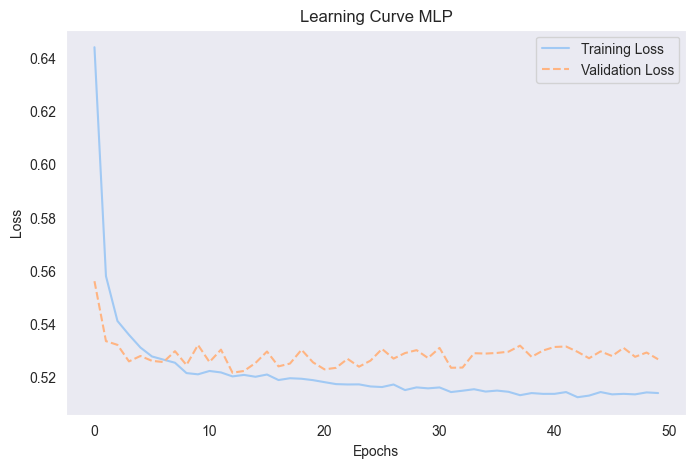

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve MLP')
plt.legend()
plt.grid()
plt.show()


In [40]:

y_val_pred = (best_model.predict(X_val_scaled) > 0.5).astype(int)


accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

print("Validation Set Performance:")
print(f"Accuracy: {accuracy_val:.4f}")
print(f"Precision: {precision_val:.4f}")
print(f"Recall: {recall_val:.4f}")
print(f"F1-Score: {f1_val:.4f}")


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Set Performance:
Accuracy: 0.7349
Precision: 0.7133
Recall: 0.7324
F1-Score: 0.7227


In [41]:
start_time = time.time()


y_test_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)


end_time = time.time()


prediction_time = end_time - start_time


accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-Score: {f1_test:.4f}")
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Confusion Matrix Values: {conf_matrix}")


print(f"Prediction Time: {prediction_time:.4f} seconds")


210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Test Set Performance:
Accuracy: 0.7392
Precision: 0.7236
Recall: 0.7416
F1-Score: 0.7325
Confusion Matrix Values: [[2562  914]
 [ 834 2393]]
Prediction Time: 0.8558 seconds


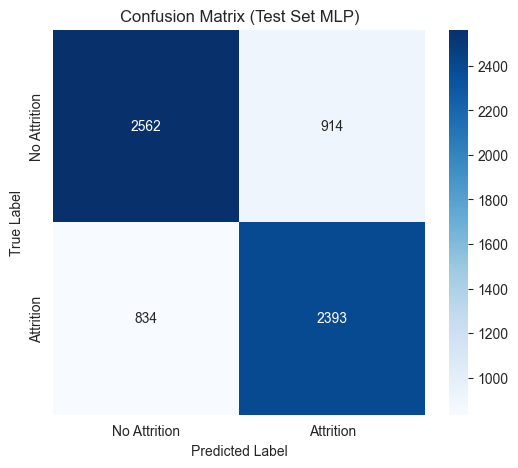

In [42]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Test Set MLP)')
plt.show()

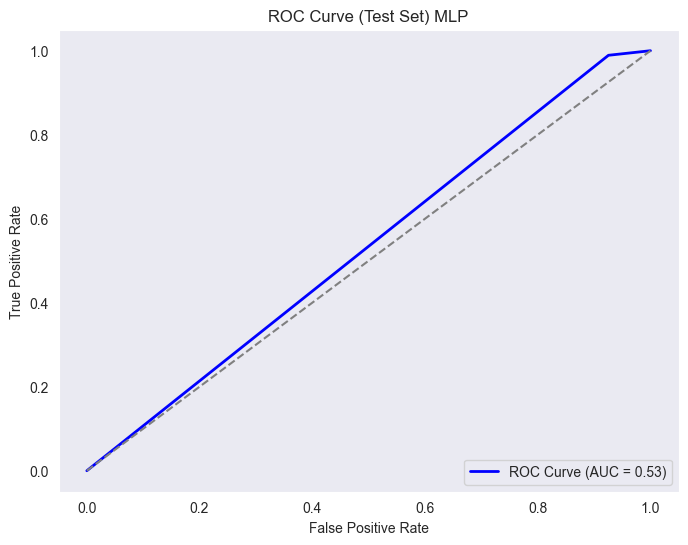

In [43]:

y_test_probs = model.predict(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set) MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

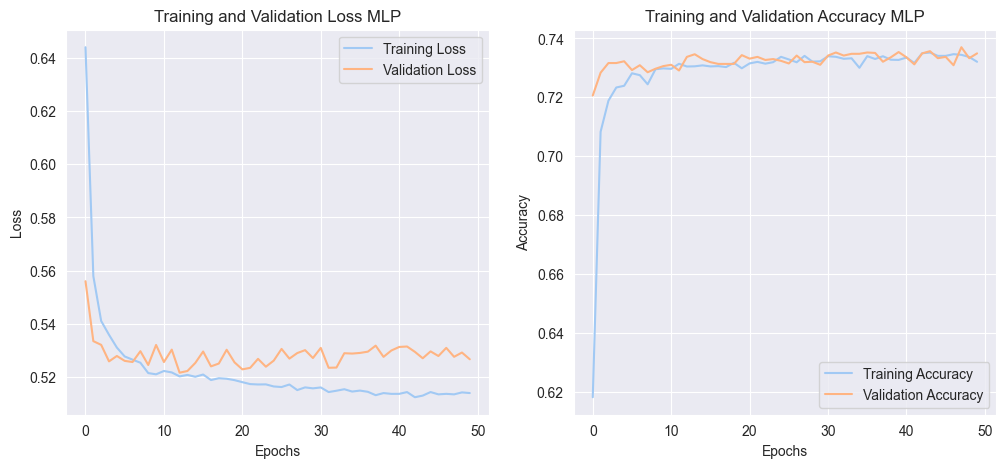

In [44]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss MLP')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy MLP')
plt.legend()

plt.show()